# Task 4 - Part I

$$x_{n+1} = rx_{n}(1 - x_{n}), n \in \mathbb{N}$$

## Logistic map and illustration

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### We need to evaluate this function for a given range of r values. Also we need to show the trajectories of the points. Chaotic systems are highly vulnerable due to the given initial data points.

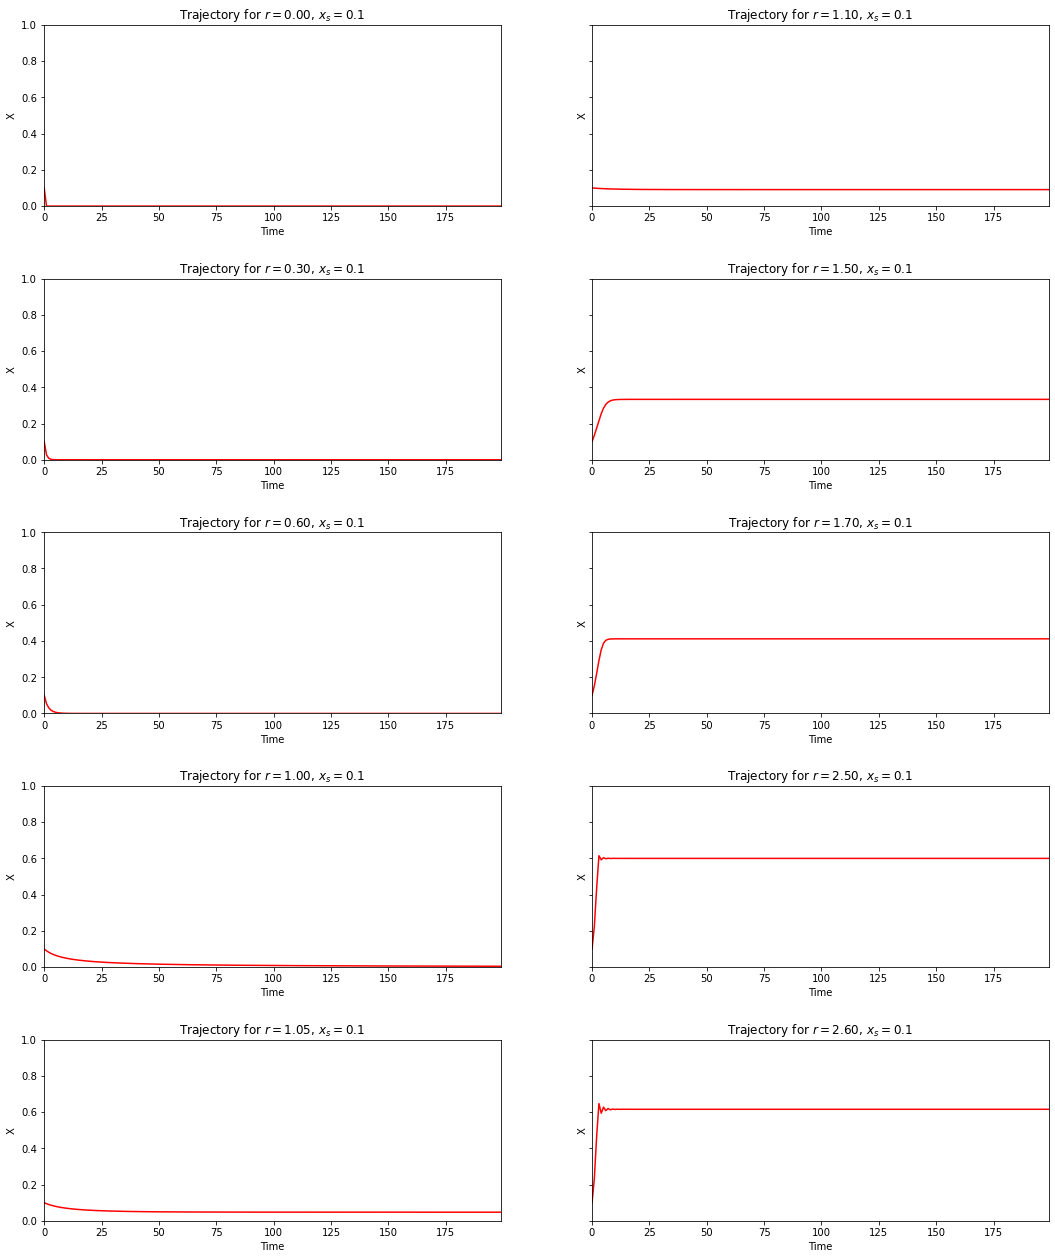

In [63]:
def logistic_map_traj(x_s, r, iteration, ax=None):
    # All data points
    data = []
    # All discrete time values
    time = []
    
    # initially we start at time = 0 and initial x is passed as x_s
    t = 0
    x = x_s
    
    # Iterate about some arbitrary number(iteration)
    
    for i in range(iteration):
        data.append(x)
        time.append(t)
        
        # Increment time
        t += 1
        
        # Evaluate the function at the current time step
        x = logistic_map(r, x)
        
    ax.plot(time, data, 'r')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, time.pop())
    ax.set_xlabel('Time')
    ax.set_ylabel('X')
    ax.set_title(f"Trajectory for $r={r:.2f}, \, x_s={x_s:.1f}$")
    
fig, axs = plt.subplots(5, 2, figsize=(18, 22), sharey=True)
plt.subplots_adjust(hspace=0.4)

# r between 0 and 2

logistic_map_traj(0.1, 0.0, 200, ax=axs[0, 0])
logistic_map_traj(0.1, 0.3, 200, ax=axs[1, 0])
logistic_map_traj(0.1, 0.6, 200, ax=axs[2, 0])
logistic_map_traj(0.1, 1.0, 200, ax=axs[3, 0])
logistic_map_traj(0.1, 1.05, 200, ax=axs[4, 0])
logistic_map_traj(0.1, 1.1, 200, ax=axs[0, 1])
logistic_map_traj(0.1, 1.5, 200, ax=axs[1, 1])
logistic_map_traj(0.1, 1.7, 200, ax=axs[2, 1])
logistic_map_traj(0.1, 2.5, 200, ax=axs[3, 1])
logistic_map_traj(0.1, 2.6, 200, ax=axs[4, 1])

### As we can observe, for differrent r values, system converges to the logistic curve i.e for r = 1.7, x = 0.4. For r between 2 and 4 :

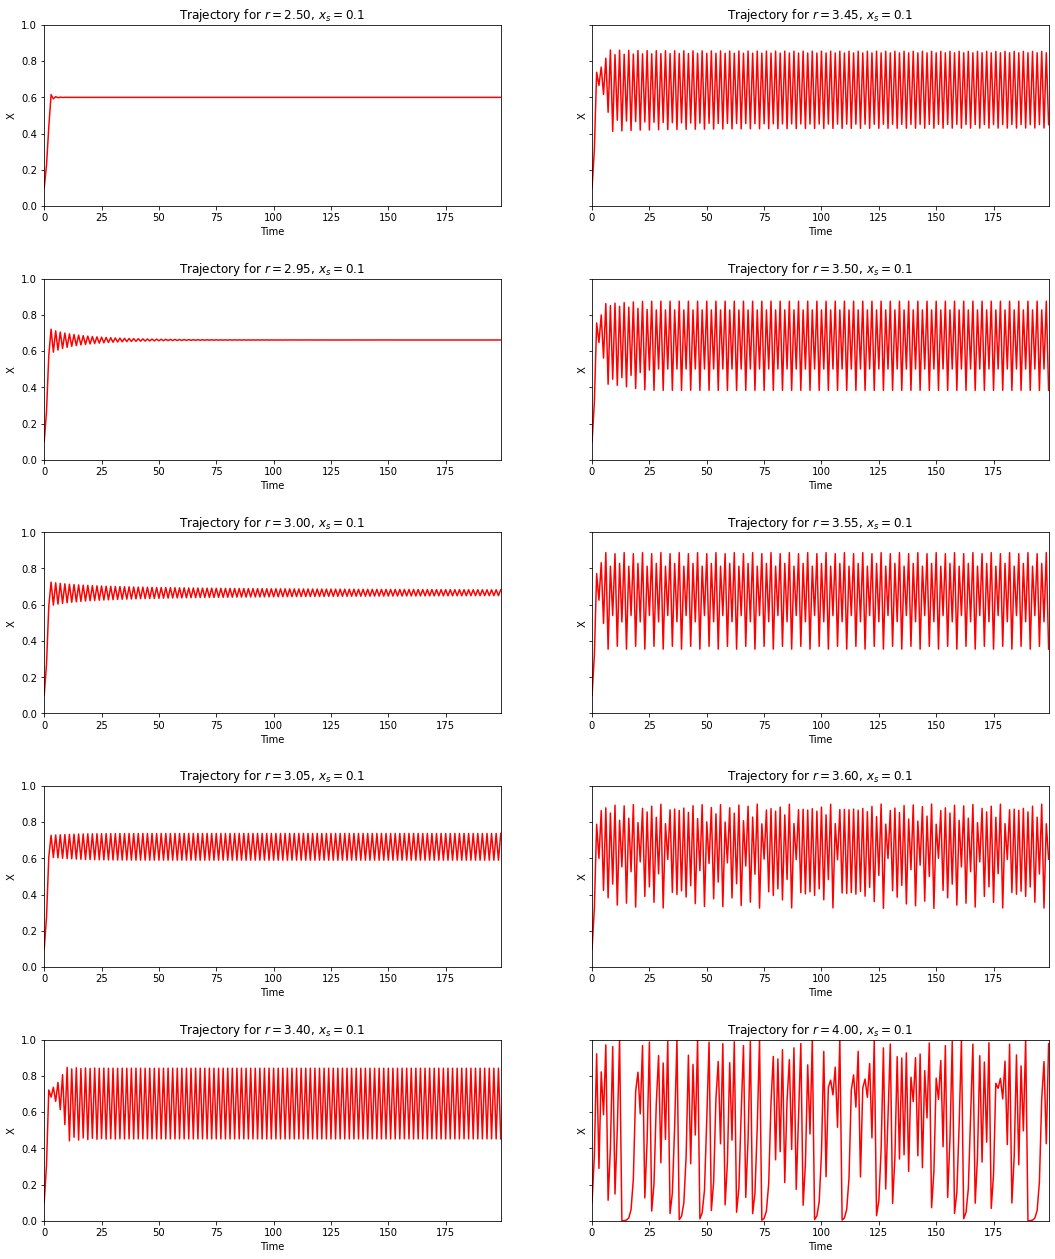

In [41]:
fig, axs = plt.subplots(5, 2, figsize=(18, 22), sharey=True)
plt.subplots_adjust(hspace=0.4)

# Varying from 2 to 4.
logistic_map_traj(0.1, 2.5, 200, ax=axs[0, 0])
logistic_map_traj(0.1, 2.95, 200, ax=axs[1, 0])
logistic_map_traj(0.1, 3.0, 200, ax=axs[2, 0])
logistic_map_traj(0.1, 3.05, 200, ax=axs[3, 0])
logistic_map_traj(0.1, 3.4, 200, ax=axs[4, 0])
logistic_map_traj(0.1, 3.45, 200, ax=axs[0, 1])
logistic_map_traj(0.1, 3.5, 200, ax=axs[1, 1])
logistic_map_traj(0.1, 3.55, 200, ax=axs[2, 1])
logistic_map_traj(0.1, 3.6, 200, ax=axs[3, 1])
logistic_map_traj(0.1, 4.0, 200, ax=axs[4, 1])



## First let's see some orbits on the logistic map and with an x=y line. 

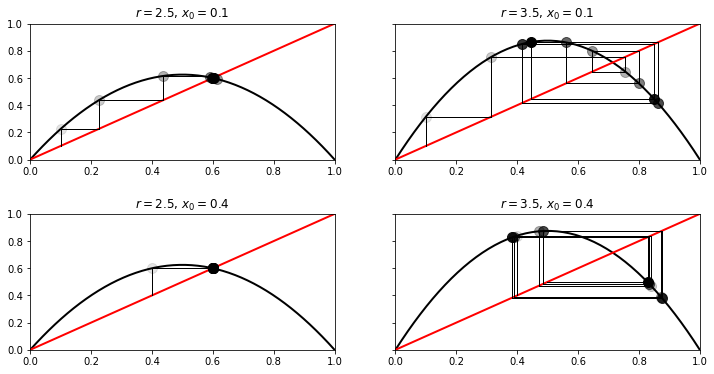

In [54]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic_map(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'r', lw=2)

    # Recursively apply logistic map
    x = x0
    for i in range(n):
        y = logistic_map(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, axs = plt.subplots(2, 2, figsize=(12, 6),
                               sharey=True)
plt.subplots_adjust(hspace=0.4)

plot_system(2.5, .1, 10, ax=axs[0,0])
plot_system(3.5, .1, 10, ax=axs[0,1])

# For different initial x points

plot_system(2.5, .4, 10, ax=axs[1,0])
plot_system(3.5, .4, 10, ax=axs[1, 1])

In [15]:
# Bifurcation for r between 0-4, x between 0-1.

# Task 4 - Part 2

## Lorenz attactor visualization

Formula here

C:\Users\caner\AppData\Local\Temp\ipykernel_3344\1132470962.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax_0.plot([st_init[0]], [st_init[1]], [st_init[2]], 'ok', ms=7, color='r', alpha=1)
C:\Users\caner\AppData\Local\Temp\ipykernel_3344\1132470962.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax_0.plot([states[int(states.size/3) - 1][0]],
C:\Users\caner\AppData\Local\Temp\ipykernel_3344\1132470962.py:68: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax_1.plot([st_init[0]], [st_init[1]], [st_init[2]], 'ok', ms=7, color='r', alpha=1)
C:\Users\caner\AppData\Local\Temp\ipykernel_3344\1132470962.py:71: UserWarning: color is redundantly define

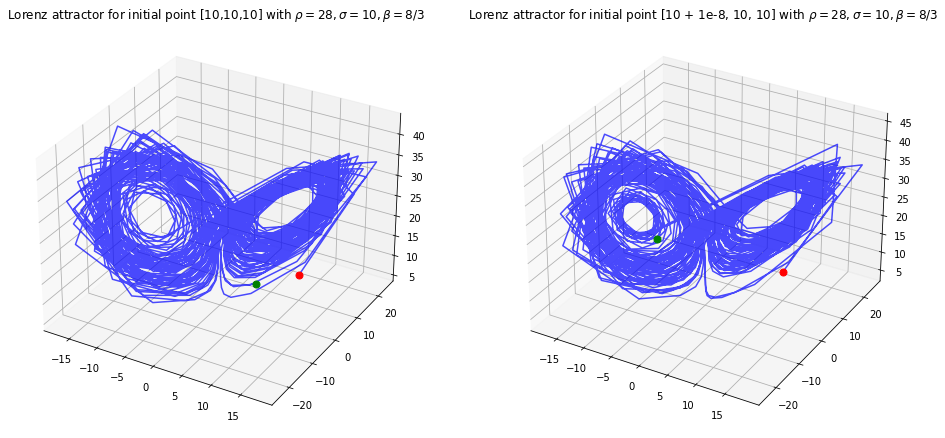

Euclidian distance extended 1 limit after 0.2350 seconds from the simulation execution


In [93]:
from scipy.integrate import odeint
from scipy.spatial import distance

# Distance function for given points. Computes the euclidian distance.
def distance_func(x1, y1, z1, x2, y2, z2):
    p1 = (x1, y1, z1)
    p2 = (x2, y2, z2)
    
    return distance.euclidean(p1, p2)

# Predefined parameter values
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

# Simulations of the both system will reside in this list for later comparisons
simulations = []

def f(state, t):
    global rho, sigma, beta
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z # Derivatives of dimension coordinates w.r.t time.

# Starting state
st_init = [10.0, 10.0, 10.0]

# Time = 1000
time = np.arange(0.0, 100, 0.1)

fig = plt.figure(figsize=(16, 8))

ax_0 = fig.add_subplot(1, 2, 1, projection="3d")

# Lorenz attractor
# First we will calculate the states
states = odeint(f, st_init, time)

# Simulations for the first system
simulations.append(states)
 
ax_0.plot(states[:, 0], states[:, 1], states[:, 2], color='b', alpha=0.7)

# Starting point for the first case [10, 10, 10]
ax_0.plot([st_init[0]], [st_init[1]], [st_init[2]], 'ok', ms=7, color='r', alpha=1)

# Ending point for the first case
ax_0.plot([states[int(states.size/3) - 1][0]],
        [states[int(states.size/3) - 1][1]],
        [states[int(states.size/3) - 1][2]], 'ok', ms=7, color='g', alpha=1)

ax_0.title.set_text(r"Lorenz attractor for initial point [10,10,10] with ${\rho = 28}, {\sigma=10}, {\beta=8/3}$")

#################################################################
# Second case, small perturbation on the x coordinate - x + 10^-8
#################################################################

st_init = [10 + 0.00000001, 10.0, 10.0]
ax_1 = fig.add_subplot(1, 2, 2, projection="3d")

states = odeint(f, st_init, time)

# Simulations for the second system
simulations.append(states)
 
ax_1.plot(states[:, 0], states[:, 1], states[:, 2], color='b', alpha=0.7)

# Starting point for the first case [10, 10, 10]
ax_1.plot([st_init[0]], [st_init[1]], [st_init[2]], 'ok', ms=7, color='r', alpha=1)

# Ending point for the first case
ax_1.plot([states[int(states.size/3) - 1][0]],
        [states[int(states.size/3) - 1][1]],
        [states[int(states.size/3) - 1][2]], 'ok', ms=7, color='g', alpha=1)

ax_1.title.set_text(r"Lorenz attractor for initial point [10 + 1e-8, 10, 10] with ${\rho = 28}, {\sigma=10}, {\beta=8/3}$")
plt.draw()
plt.show()

#################################################################
# Simulation comparison
#################################################################

euc_dist = 0
iteration = 0

while(euc_dist <= 1):
    x1, y1, z1 = (simulations[0][iteration][0], simulations[0][iteration][1], simulations[0][iteration][2])
    x2, y2, z2 = (simulations[1][iteration][0], simulations[1][iteration][1], simulations[1][iteration][2])
    euc_dist = distance_func(x1, y1, z1, x2, y2, z2)
    iteration += 1
    
sim_end_time_seconds = iteration/(simulations[0].size/3)
print(f"Euclidian distance extended 1 limit after {sim_end_time_seconds:.4f} seconds from the simulation execution")